<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Fast_Fourier_Transform_Implementation_(recursive_Cooley_Tukey_algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

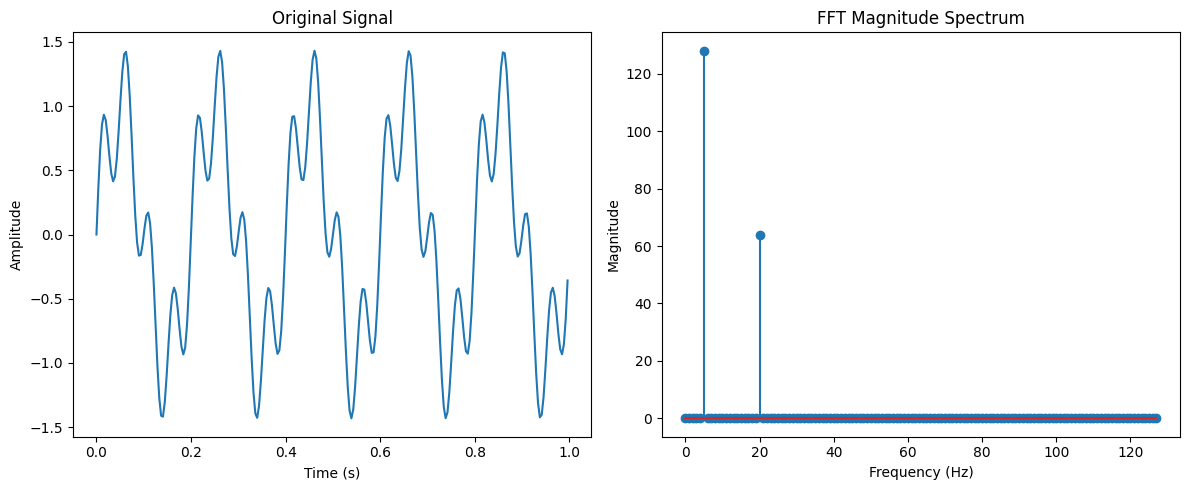

In [ ]:
# Re-import necessary libraries after state reset
import numpy as np
import matplotlib.pyplot as plt

# Fast Fourier Transform Implementation (recursive Cooley-Tukey algorithm)
def fft_recursive(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft_recursive(x[0::2])
    odd = fft_recursive(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]

# Generate a sample signal: sum of sine waves with different frequencies
t = np.linspace(0, 1, 256, endpoint=False)
freq1, freq2 = 5, 20
signal = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t)

# Apply FFT
fft_result = fft_recursive(signal)
frequencies = np.fft.fftfreq(len(signal), d=(t[1] - t[0]))
magnitude = np.abs(fft_result[:len(signal)//2])

# Plot original signal and FFT result
plt.figure(figsize=(12, 5))

# Plot original signal
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot FFT spectrum
plt.subplot(1, 2, 2)
plt.stem(frequencies[:len(signal)//2], magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
